In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
A=pd.read_csv('/content/drive/My Drive/Case Studies/car_sales.csv',index_col=0)
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [0]:
A.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

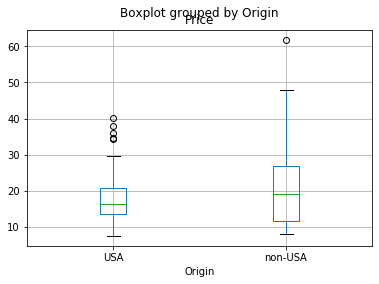

In [0]:
A.boxplot(column='Price',by='Origin')

In [0]:
from scipy.stats import ttest_ind,f_oneway,levene,bartlett,shapiro,mannwhitneyu

In [0]:
shapiro(A['Price'])

(0.8805127143859863, 4.2348321471763484e-07)

In [0]:
levene(A['Wheelbase'],A['Price'])

LeveneResult(statistic=2.796101149756695, pvalue=0.09619342929244948)

In [0]:
bartlett(A['Wheelbase'],A['Price'])

BartlettResult(statistic=10.872177231543183, pvalue=0.0009761970105959059)

In [0]:
A_USA=A[A['Origin']=='USA']
A_ER=A[A['Origin']=='non-USA']


In [0]:
ttest_ind(A_USA['Price'],A_ER['Price'])

Ttest_indResult(statistic=-0.9655463914123011, pvalue=0.33683021808366587)

In [0]:
A['Type'].value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [0]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [0]:
levene(A['Price'],A['RPM'])

LeveneResult(statistic=183.9939245351451, pvalue=1.6713019431460332e-29)

In [0]:
A['Passengers'].value_counts()

5    41
4    23
6    18
7     8
2     2
8     1
Name: Passengers, dtype: int64

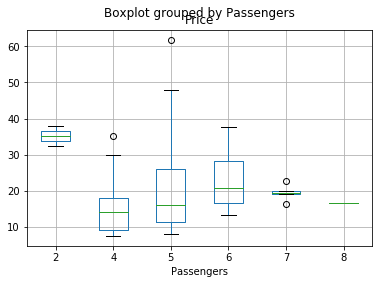

In [0]:
A.boxplot(column='Price',by='Passengers')

In [0]:
B=A.drop(['Manufacturer','Make','Min.Price','Max.Price','Model','Origin'],axis=1)
X=B.drop('Price',axis=1)
Y=B['Price']

In [0]:
B['Cylinders'].value_counts()

4         49
6         31
8          7
3          3
5          2
rotary     1
Name: Cylinders, dtype: int64

In [0]:
BT=B.groupby(by='Cylinders')
BT_1=BT.get_group('3')
BT_2=BT.get_group('4')
BT_3=BT.get_group('5')
BT_4=BT.get_group('6')
BT_5=BT.get_group('8')
BT_6=BT.get_group('rotary')


In [0]:
from scipy.stats import f_oneway,ttest_ind

In [0]:
f_oneway(BT_1['Price'],BT_2['Price'],BT_3['Price'],BT_4['Price'],BT_5['Price'],BT_6['Price'])

F_onewayResult(statistic=14.363287536833516, pvalue=3.042776105990462e-10)

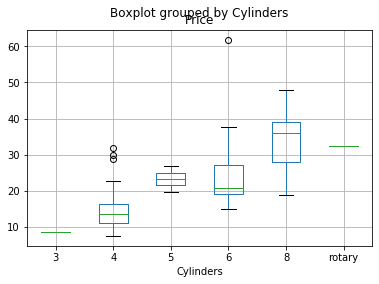

In [0]:
A.boxplot(column='Price',by='Cylinders')

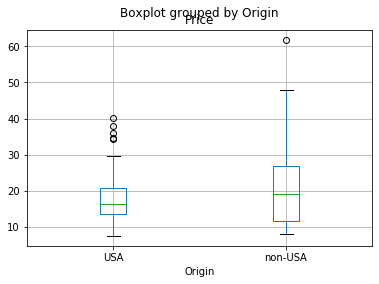

In [0]:
A.boxplot(column='Price',by='Origin')

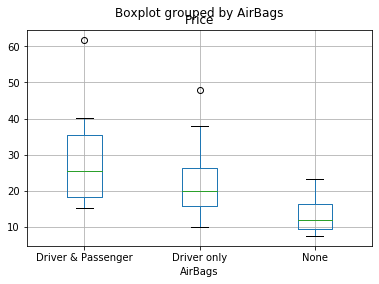

In [0]:
A.boxplot(column='Price',by='AirBags')

In [0]:
BO=B.groupby(by='Origin')
BO_1=BO.get_group('USA')
BO_2=BO.get_group('non-USA')

In [0]:
A['AirBags'].value_counts()

Driver only           43
None                  34
Driver & Passenger    16
Name: AirBags, dtype: int64

In [0]:
BA=B.groupby(by='AirBags')
BA_1=BA.get_group('None')
BA_2=BA.get_group('Driver & Passenger')
BA_3=BA.get_group('Driver only')

In [0]:
f_oneway(BA_1['Price'],BA_2['Price'],BA_3['Price'])

F_onewayResult(statistic=21.177572370824066, pvalue=2.9011868198272043e-08)

In [0]:
ttest_ind(BO_1['Price'],BO_2['Price'])

Ttest_indResult(statistic=-0.9655463914123011, pvalue=0.33683021808366587)

In [0]:
A['Man.trans.avail'].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

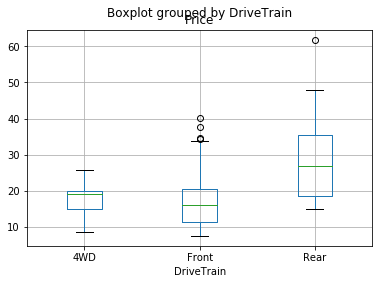

In [0]:
A.boxplot(column='Price',by='DriveTrain')

In [0]:
A.boxplot(column='Price',by='Man.trans.avail')

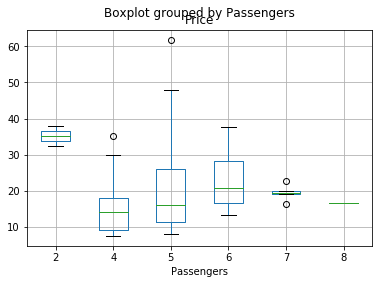

In [0]:
A.boxplot(column='Price',by='Passengers')

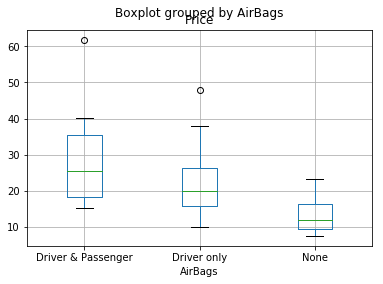

In [0]:
A.boxplot(column='Price',by='AirBags')

In [0]:
A1=A[A['AirBags']=='Driver & Passenger']
A['AirBags'].value_counts()

Driver only           43
None                  34
Driver & Passenger    16
Name: AirBags, dtype: int64

In [0]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 21 columns):
Type                  93 non-null object
Price                 93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64
Rear.seat.room        91 non-null float64
Luggage.room          82 non-null float64
Weight                93 non-null int64
dtypes: float64(5), int64(11), object(5)
m

In [0]:
B['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)


In [0]:
B['AirBags'].replace({'Driver & Passenger':2,'Driver only':1,'None':0},inplace=True)


In [0]:
B['Cylinders'].replace({'3':0,'4':1,'6':2,'5':3,'rotary':4,'8':5},inplace=True)


In [0]:
B['Passengers'].replace({4:0,5:1,8:2,7:3,6:4,2:5},inplace=True)


In [0]:
B['DriveTrain'].replace({'Front':0,'4WD':1,'Rear':2},inplace=True)

In [0]:
B['Type'].replace({'Small':0,'Compact':1,'Sporty':2,'Van':3,'Large':4,'Midsize':5},inplace=True)

In [99]:
B.shape

(93, 21)

In [0]:
B['Rear.seat.room'].fillna(X['Rear.seat.room'].median(),inplace=True)
B['Luggage.room'].fillna(X['Luggage.room'].median(),inplace=True)

In [0]:
#Method-1
B_airbags=pd.get_dummies(B['AirBags'])
B_cyl=pd.get_dummies(B['Cylinders'])
B_update=pd.concat([B,B_airbags],axis=1)
#Dummies for Drive Train
B_DT=pd.get_dummies(B['DriveTrain'])
B_update=pd.concat([B_update,B_DT],axis=1)
#Dummies for Cylinders
B_cyl=pd.get_dummies(B['Cylinders'])
B_update=pd.concat([B_update,B_cyl],axis=1)
#Dummies for Type
B_type=pd.get_dummies(B['Type'])
B_update=pd.concat([B_update,B_type],axis=1)


In [0]:
X=B.drop('Price',axis=1)
Y=B['Price']

In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 20 columns):
Type                  93 non-null int64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null int64
DriveTrain            93 non-null int64
Cylinders             93 non-null int64
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null int64
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64
Rear.seat.room        93 non-null float64
Luggage.room          93 non-null float64
Weight                93 non-null int64
dtypes: float64(4), int64(16)
memory usage: 15.3 KB


In [163]:
X.shape,Y.shape

((93, 20), (93,))

In [0]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [108]:
Xc=sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [111]:
Xc.head()

,const,Type,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
1,1.0,0,25,31,0,0,1,1.8,140,6300,2890,1,13.2,1,177,102,68,37,26.5,11.0,2705
2,1.0,5,18,25,2,0,2,3.2,200,5500,2335,1,18.0,1,195,115,71,38,30.0,15.0,3560
3,1.0,1,20,26,1,0,2,2.8,172,5500,2280,1,16.9,1,180,102,67,37,28.0,14.0,3375
4,1.0,5,19,26,2,0,2,2.8,172,5500,2535,1,21.1,4,193,106,70,37,31.0,17.0,3405
5,1.0,5,22,30,1,2,1,3.5,208,5700,2545,1,21.1,0,186,109,69,39,27.0,13.0,3640


In [0]:
model=sm.OLS(Y,Xc).fit()

In [110]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     16.86
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           1.11e-19
Time:                        08:57:10   Log-Likelihood:                -261.58
No. Observations:                  93   AIC:                             565.2
Df Residuals:                      72   BIC:                             618.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 89.5120     26.213      3.415      0.001      37.258     141.766
Type                   1.0151      0.441      2.303      0.024       0.137       1.894
MPG.city              -0.1216      0.374     -0.325      0.746      -0.867       0.624
MPG.highway           -0.0682      0.363     -0.188      0.852      -0.792       0.656
AirBags                3.6764      0.871      4.221      0.000       1.940       5.413
DriveTrain             1.6293      0.809      2.013      0.048       0.016       3.242
Cylinders              0.8312      0.781      1.064      0.291      -0.726       2.389
EngineSize             1.0645      1.635      0.651      0.517      -2.195       4.324
Horsepower             0.1153      0.032      3.599      0.001       0.051       0.179
RPM                   -0.0014      0.002     -0.779      0.438      -0.005       0.002
Rev.per.mile           0.0021      0.002      1.026      0.309      -0.002       0.006
Man.trans.avail       -1.2616      1.755     -0.719      0.475      -4.761       2.238
Fuel.tank.capacity     0.1933      0.399      0.484      0.630      -0.602       0.989
Passengers            -0.1002      0.523     -0.192      0.848      -1.142       0.941
Length                -0.0003      0.081     -0.004      0.997      -0.161       0.161
Wheelbase              0.2660      0.210      1.270      0.208      -0.152       0.684
Width                 -1.5041      0.378     -3.975      0.000      -2.258      -0.750
Turn.circle           -0.6566      0.296     -2.219      0.030      -1.246      -0.067
Rear.seat.room         0.2524      0.286      0.884      0.380      -0.317       0.822
Luggage.room           0.1222      0.297      0.411      0.682      -0.470       0.714
Weight                 0.0006      0.004      0.155      0.877      -0.007       0.008
==============================================================================
Omnibus:                       25.166   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.046
Skew:                           0.899   Prob(JB):                     7.51e-15
Kurtosis:                       6.681   Cond. No.                     3.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

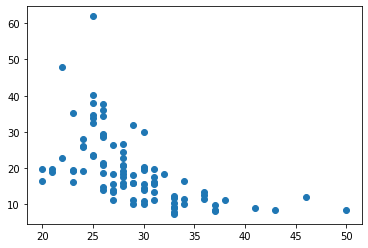

In [114]:
plt.scatter(B['MPG.highway'],B['Price'])

In [115]:
X.columns

Index(['Type', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')

In [0]:
X_new=X[['Type','AirBags','DriveTrain','Horsepower','Width']]


In [121]:
X_new_c=sm.add_constant(X_new)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model2=sm.OLS(Y,X_new_c).fit()

In [123]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     52.39
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           8.50e-25
Time:                        09:29:56   Log-Likelihood:                -277.79
No. Observations:                  93   AIC:                             567.6
Df Residuals:                      87   BIC:                             582.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.3568     13.330      4.078      0.000      27.863      80.851
Type           1.7354      0.385      4.513      0.000       0.971       2.500
AirBags        2.8723      0.850      3.380      0.001       1.183       4.561
DriveTrain     2.1569      0.747      2.889      0.005       0.673       3.641
Horsepower     0.1183      0.014      8.341      0.000       0.090       0.147
Width         -0.8555      0.209     -4.102      0.000      -1.270      -0.441
==============================================================================
Omnibus:                       32.928   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.962
Skew:                           1.235   Prob(JB):                     9.66e-19
Kurtosis:                       6.912   Cond. No.                     4.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [0]:
X_qr=X[['MPG.city','MPG.highway']]

In [141]:
X_new_df.head()

,0,1,2,3,4
0,-1.275407,-1.140297,-0.587083,-0.073484,-0.366184
1,1.360434,1.687640,-0.587083,1.078322,0.431983
2,-0.748239,0.273671,-0.587083,0.540813,-0.632239
3,1.360434,1.687640,-0.587083,0.540813,0.165927
4,1.360434,0.273671,2.012854,1.231897,-0.100128


In [0]:
sc=StandardScaler()
X_std=sc.fit_transform(X_qr)
X_new_std=sc.fit_transform(X_new)
X_new_df=pd.DataFrame(X_new_std)

In [133]:
X_std[:3,:]

array([[ 0.47131249,  0.36092485],
       [-0.78103212, -0.77051373],
       [-0.42321938, -0.58194063]])

In [146]:
#Quadratic Regression Model
qr=PolynomialFeatures(degree=3)
XQR=qr.fit_transform(X_std)
XQR_df=pd.DataFrame(XQR)
XQR_df.head()



,0,1,2,3,4,5,6,7,8,9
0,1.0,0.471312,0.360925,0.222135,0.170108,0.130267,0.104695,0.080174,0.061396,0.047017
1,1.0,-0.781032,-0.770514,0.610011,0.601796,0.593691,-0.476438,-0.470022,-0.463692,-0.457447
2,1.0,-0.423219,-0.581941,0.179115,0.246289,0.338655,-0.075805,-0.104234,-0.143325,-0.197077
3,1.0,-0.602126,-0.581941,0.362555,0.350401,0.338655,-0.218304,-0.210986,-0.203913,-0.197077
4,1.0,-0.065407,0.172352,0.004278,-0.011273,0.029705,-0.000280,0.000737,-0.001943,0.005120


In [150]:
X_final=pd.concat([X_new_df,XQR_2],axis=1)
X_final.head()


,0,1,2,3,4,1,2,3,4,5,6,7,8,9
0,-1.275407,-1.140297,-0.587083,-0.073484,-0.366184,0.471312,0.360925,0.222135,0.170108,0.130267,0.104695,0.080174,0.061396,0.047017
1,1.360434,1.687640,-0.587083,1.078322,0.431983,-0.781032,-0.770514,0.610011,0.601796,0.593691,-0.476438,-0.470022,-0.463692,-0.457447
2,-0.748239,0.273671,-0.587083,0.540813,-0.632239,-0.423219,-0.581941,0.179115,0.246289,0.338655,-0.075805,-0.104234,-0.143325,-0.197077
3,1.360434,1.687640,-0.587083,0.540813,0.165927,-0.602126,-0.581941,0.362555,0.350401,0.338655,-0.218304,-0.210986,-0.203913,-0.197077
4,1.360434,0.273671,2.012854,1.231897,-0.100128,-0.065407,0.172352,0.004278,-0.011273,0.029705,-0.000280,0.000737,-0.001943,0.005120


In [151]:
X_final.shape

(93, 14)

In [149]:
XQR_2=XQR_df.drop([0],axis=1)
XQR_2.head()

,1,2,3,4,5,6,7,8,9
0,0.471312,0.360925,0.222135,0.170108,0.130267,0.104695,0.080174,0.061396,0.047017
1,-0.781032,-0.770514,0.610011,0.601796,0.593691,-0.476438,-0.470022,-0.463692,-0.457447
2,-0.423219,-0.581941,0.179115,0.246289,0.338655,-0.075805,-0.104234,-0.143325,-0.197077
3,-0.602126,-0.581941,0.362555,0.350401,0.338655,-0.218304,-0.210986,-0.203913,-0.197077
4,-0.065407,0.172352,0.004278,-0.011273,0.029705,-0.000280,0.000737,-0.001943,0.005120


In [0]:
idx=np.arange(X_MVLR.shape[0])
X_MVLR.index=idx
XQR_final_2=pd.concat([XQR_final,X_MVLR],axis=1)
XQR_final_2.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Width,Turn.circle,Type_Compact,Type_Sporty,Type_Small,Type_Midsize,Cylinders_4,Cylinders_6,Cylinders_8,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,DriveTrain_4WD
0,0.471312,0.360925,-0.073484,1.129530,0.222135,0.170108,-0.034634,0.532362,0.130267,-0.026522,0.407675,0.005400,-0.083003,1.275838,68,37,0,0,1,0,1,0,0,0,0,1,1,0,0
1,-0.781032,-0.770514,1.078322,0.005661,0.610011,0.601796,-0.842204,-0.004422,0.593691,-0.830862,-0.004362,1.162779,0.006105,0.000032,71,38,0,0,0,1,0,1,0,1,0,0,1,0,0
2,-0.423219,-0.581941,0.540813,-0.105713,0.179115,0.246289,-0.228882,0.044740,0.338655,-0.314721,0.061519,0.292478,-0.057171,0.011175,67,37,1,0,0,0,0,1,0,0,1,0,1,0,0
3,-0.602126,-0.581941,0.540813,0.410659,0.362555,0.350401,-0.325637,-0.247268,0.338655,-0.314721,-0.238979,0.292478,0.222090,0.168641,70,37,0,0,0,1,0,1,0,1,0,0,1,0,0
4,-0.065407,0.172352,1.231897,0.430909,0.004278,-0.011273,-0.080574,-0.028184,0.029705,0.212320,0.074268,1.517569,0.530835,0.185682,69,39,0,0,0,1,1,0,0,0,1,0,0,1,0


In [0]:
test=np.array([1,1,0,1,0,1,1,0,1])
(test-np.mean(test))/np.std(test,ddof=1)

array([ 0.66666667,  0.66666667, -1.33333333,  0.66666667, -1.33333333,
        0.66666667,  0.66666667, -1.33333333,  0.66666667])

In [0]:
XQR_final_2.shape

(93, 29)

In [0]:
QR=LinearRegression()

In [0]:
models = []
models.append(('QR', QR))

QR: 5.707418 (0.606872)


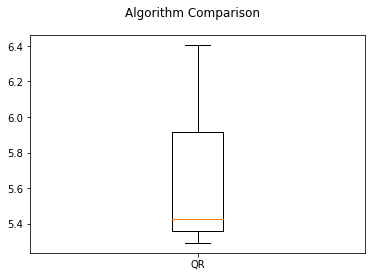

In [0]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, XQR_final_2, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
knn=KNeighborsRegressor()
knn_params={'n_neighbors':np.arange(3,20),'weights':['uniform','distance']}

In [0]:
GS=GridSearchCV(knn,knn_params,cv=3,scoring='neg_mean_squared_error')

In [177]:
X.columns

Index(['Type', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')

In [0]:
X_scaled=sc.fit_transform(X)

In [175]:
GS.fit(X_scaled,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [176]:
GS.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [0]:
dt=DecisionTreeRegressor(random_state=0)
dt_params={'max_depth':np.arange(1,50),'min_samples_leaf':np.arange(2,15)}

In [0]:
GS_dt=GridSearchCV(dt,dt_params,cv=3,scoring='neg_mean_squared_error')

In [180]:
GS_dt.fit(X_scaled,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 

In [181]:
GS_dt.best_params_ 

{'max_depth': 4, 'min_samples_leaf': 7}

In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:
KNN=KNeighborsRegressor(n_neighbors=3,weights='distance')
DT=DecisionTreeRegressor(max_depth=4,min_samples_leaf=8,random_state=0)
RF=RandomForestRegressor(n_estimators=41,random_state=0)

In [0]:
AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=50,random_state=0)
GBoost=GradientBoostingRegressor(n_estimators=800)
#stacked = VotingRegressor(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF)])

In [0]:
models = []
models.append(('KNNRegressor',KNN))
models.append(('DT_Regressor',DT))
models.append(('RF_Regressor',RF))
#models.append(('AdaBoostRF',AB_RF))
#models.append(('GradientBoostRegressor',GBoost))
#models.append(('VotingRegressor',stacked))

KNNRegressor: 6.082606 (3.399802)
DT_Regressor: 6.306883 (2.476063)
RF_Regressor: 5.873376 (3.091059)


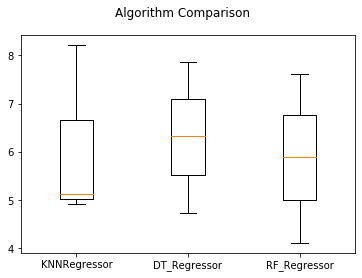

In [232]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_scaled, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
results

[array([3.45686825, 6.76581015, 7.51945109])]

MVLR: 5.417600 (0.945460)


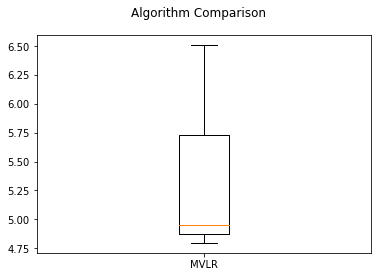

In [0]:
# Validating the 3rd order Polynomial Regression Model
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_final_NL, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
A.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [0]:
X_new=A[['MPG.city','MPG.highway','DriveTrain','Cylinders','Man.trans.avail','EngineSize',
     'Horsepower','Rev.per.mile','Fuel.tank.capacity','Length','Width','Turn.circle',
     'Rear.seat.room','Luggage.room','Weight','AirBags']]
Y=A[['Price']]

In [0]:
X_new['Rear.seat.room'].fillna(X_new['Rear.seat.room'].median(),inplace=True)
X_new['Luggage.room'].fillna(X_new['Luggage.room'].median(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
X_new['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
X_new['Man.trans.avail'].value_counts()

1    61
0    32
Name: Man.trans.avail, dtype: int64

In [0]:
X_airbags=pd.get_dummies(X_new['AirBags'])
X_update=pd.concat([X_new,X_airbags],axis=1)
#Dummies for Drive Train
X_DT=pd.get_dummies(X_new['DriveTrain'])
X_update=pd.concat([X_update,X_DT],axis=1)
#Dummies for Cylinders
X_cyl=pd.get_dummies(X_new['Cylinders'])
X_update=pd.concat([X_update,X_cyl],axis=1)


In [0]:
X_pca=X_update.drop(['AirBags','DriveTrain','Cylinders'],axis=1)
X_pca.shape

(93, 25)

In [0]:
sc=StandardScaler()
X_std=sc.fit_transform(X_pca)

In [0]:
cov_matrix = np.cov(X_std.T)

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [0]:
eig_vals

array([ 1.05639825e+01,  2.21623553e+00,  1.97742222e+00,  1.64815576e+00,
        1.46788965e+00,  1.34235055e+00,  1.13872609e+00,  1.03506372e+00,
        7.65259652e-01,  7.14761055e-01,  4.38176083e-01,  3.84028601e-01,
        3.49706736e-01,  3.19301571e-01,  2.46137236e-01,  1.76709440e-01,
        1.65648374e-01,  1.31646708e-01,  7.35021107e-02,  5.75413972e-02,
        2.52531681e-02,  3.42409581e-02, -1.00582954e-15,  1.81664614e-16,
        7.20749257e-17])

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

In [0]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 41.80156524  50.57118541  58.39582389  64.9175585   70.72598205
  76.03764873  80.54357563  84.63931164  87.66743586  90.49573766
  92.22959572  93.74919276  95.13297856  96.39645144  97.37041383
  98.06965119  98.72512002  99.24604463  99.53689169  99.76458238
  99.90007349 100.         100.         100.         100.        ]


In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]

In [0]:
P_reduce = np.array(eigvectors_sort[0:18]).transpose()

In [0]:
# Let's project data onto 2D space
Proj_data = np.dot(X_std,P_reduce)
Proj_data.shape

(93, 18)

In [0]:
type(Proj_data)

numpy.ndarray

In [0]:
from sklearn import metrics

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model, name in zip([LR],['LinearRegression']):
    rmse=[]
    for train,test in kf.split(Proj_data,Y):
        Xtrain,Xtest=Proj_data[train,:],Proj_data[test,:]
        Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print("RMSE scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(rmse),
                                    np.std(rmse,ddof=1), name ))   

RMSE scores: 5.59 (+/- 0.66965) [LinearRegression]


In [0]:
(0.8232-0.6695)/0.8232

0.18671039844509238

In [0]:
(5.59-5.218)/5.59

0.06654740608228979

In [0]:
LR.fit(Proj_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Proj_data[:3,:]

array([[-2.81652748,  0.4970531 , -0.17612774,  0.11797536, -0.53746396,
        -0.49336638, -0.93157584, -0.60474956, -0.50371156,  0.33618957,
         0.06093331,  0.37863056, -0.15931071, -0.47448517,  0.10257462,
         0.0247102 , -0.3513485 , -0.4009162 ],
       [ 2.05058911,  1.48754754, -0.88897247, -0.40395142, -1.72220391,
         1.30726231,  0.21374133,  0.51143238,  0.33785688,  0.79294483,
         1.45114265, -0.4496693 ,  0.03237301,  0.05507902, -0.10005991,
         0.22011326, -0.57351748,  0.11151065],
       [ 0.53065519, -0.01696641, -0.07756391,  0.98335371, -0.15446132,
         1.24417273,  1.16116244,  0.02597672, -1.13148599, -0.28995139,
         1.41305473, -0.50229087,  0.38236043,  0.40106005,  0.0897804 ,
         0.01048487, -0.31593692, -0.14793751]])

In [0]:
LR.predict(Proj_data[:3,:])

array([[13.85406475],
       [32.64112448],
       [29.11178737]])

In [0]:
Y.iloc[:3]

,Price
1,15.9
2,33.9
3,29.1


In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
LR_bag=BaggingRegressor(n_estimators=10,random_state=0)
LR_boost=AdaBoostRegressor(n_estimators=100,random_state=0)
Gboost=GradientBoostingRegressor(n_estimators=100,random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [0]:
LR=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=7)

In [0]:
models = []
models.append(('MVLR', LR))
models.append(('KNearestNeighbors',KNN))

MVLR: 5.586814 (1.059308)
KNearestNeighbors: 6.433366 (4.996524)


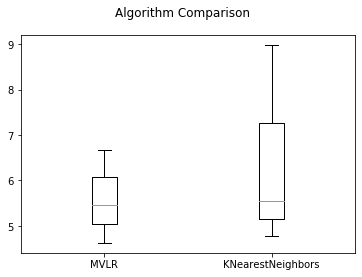

In [145]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_new_df, Y,cv=kfold, 
	                                             scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
	                       np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

MVLR: 5.948997 (0.413776)
KNearestNeighbors: 6.360171 (3.294896)


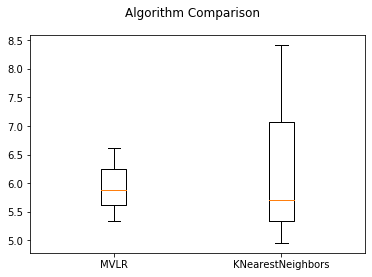

In [152]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_final, Y,cv=kfold, 
	                                             scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
	                       np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()